<div style="text-align: center;">
  <h1> ساختمان داده ها و الگوریتم ها</h1>
  <h2>استاد : دکتر فرشید مهر دوست</h2>
  <h3>گرد آورنده گان: عسل محمودی نژاد و کیارش دادپور</h3>
</div>

<hr style="border: none; height: 3px; background-color: #007BFF; margin-top: 20px;">


<div style="text-align: center;">
  <h2>الگوریتم های مرتب سازی</h2>
</div>

### Bubble Sort 


In [1]:
def bubble_sort(A):
    n = len(A)
    for i in range(n):
        for j in range(0, n - i - 1):
            if A[j] > A[j + 1]:
                A[j], A[j + 1] = A[j + 1], A[j]
    return A

In [2]:
A = [1, 6, 9, 6, 1, 2, 7, 8, 10, 6, 2, 0, 3, 4, 2]
bubble_sort(A)

[0, 1, 1, 2, 2, 2, 3, 4, 6, 6, 6, 7, 8, 9, 10]

### Insertion Sort 

In [3]:
def insertion_sort(A):
    n = len(A)
    for i in range(1, n):
        key = A[i]
        j = i - 1
        while j >= 0 and key < A[j]:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key 
    return A

In [4]:
A = [7, 5, 3, 6, 0, 5, 9, 8, 4, 0, 0, 1, 4, 7, 1]
insertion_sort(A)

[0, 0, 0, 1, 1, 3, 4, 4, 5, 5, 6, 7, 7, 8, 9]

### Counting Sort

In [5]:
def counting_sort(A): 
    n = len(A)
    m = max(A)
    count = [0] * (m + 1)
    for i in A:
        count[i] += 1
    res = []
    k = 0
    for i in count:
        res += [k] * i
        k += 1
    return res

In [6]:
A = [3, 0, 1, 3, 3, 5, 0, 1, 4, 3, 2, 5, 5, 0, 5, 4, 2, 0, 0, 1]
counting_sort(A)

[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5]

### Selection Sort

In [7]:
def selection_sort(A):
    n = len(A)
    for i in range(n):
        m_index = i
        for j in range(i + 1, n):
            if A[m_index] > A[j]:
                m_index = j
        A[m_index], A[i] = A[i], A[m_index]
    return A

In [8]:
A = [7, 5, 3, 6, 0, 5, 9, 8, 4, 0, 0, 1, 4, 7, 1]
selection_sort(A)

[0, 0, 0, 1, 1, 3, 4, 4, 5, 5, 6, 7, 7, 8, 9]


<div style="text-align: center;">
  <h2> مقایسه‌ی توابع رشد </h2>
</div>

In [9]:
%matplotlib inline
from matplotlib.pyplot import *
import math
rcParams.update({'font.size': 25, 'font.family': 'serif', 'lines.linewidth': 3})

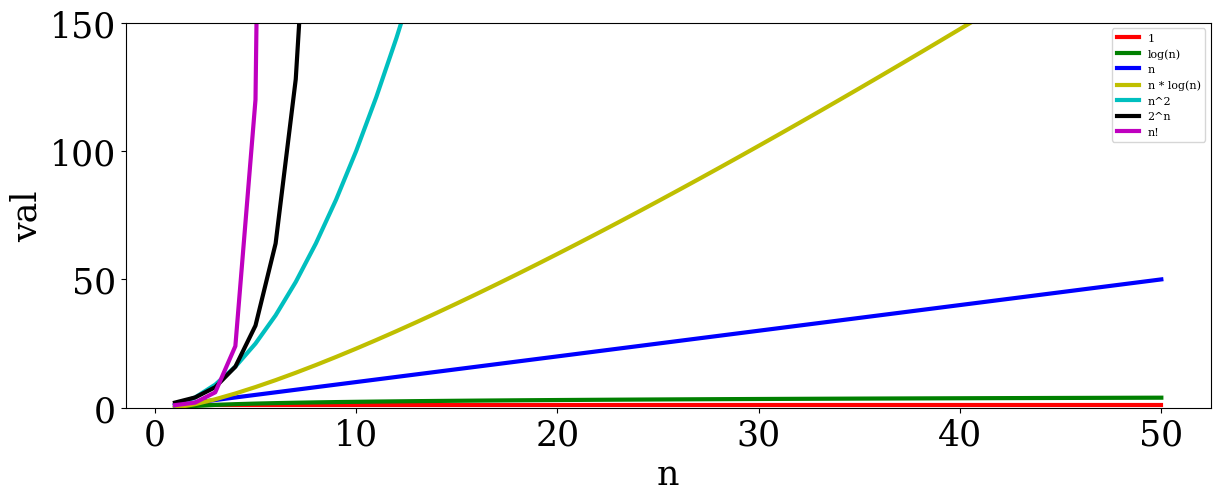

In [10]:
figure(figsize=(14, 5))
xlabel("n")
ylabel("val")
ylim(0, 150)
max_n = 50
x = range(1, max_n + 1)
y = [1 for n in x]
plot(x, y, 'r', label='1',linewidth=3)
y = [math.log(n) for n in x]
plot(x, y, 'g', label='log(n)')
y = [n for n in x]
plot(x, y, 'b', label='n')
y = [n * math.log(n) for n in x]
plot(x, y, 'y', label='n * log(n)')
y = [n ** 2 for n in x]
plot(x, y, 'c', label='n^2')
y = [2 ** n for n in x]
plot(x, y, 'k', label='2^n')
y = [math.factorial(n) for n in x]
plot(x, y, 'm', label='n!')
legend(loc=1, fontsize=8)
show()



<div style="text-align: center;">
  <h2> ماتریس اسپارس</h2>
</div>



<div dir="rtl" style="font-size: 20px;">
</p>
 ماتریس اسپارس  به ماتریسی گفته می‌شود که بخش عمده‌ای از عناصر آن مقدار صفر دارند، به‌طوری‌که تنها تعداد کمی از عناصر غیرصفر هستند. در این نوع ماتریس‌ها، به جای ذخیره تمامی مقادیر، تنها مقادیر غیرصفر و موقعیت‌های آن‌ها ذخیره می‌شود که منجر به صرفه‌جویی در حافظه و بهبود کارایی در پردازش‌های خاص می‌شود. ویژگی اصلی این ماتریس‌ها چگالی کم و صرفه‌جویی در حافظه است. ماتریس‌های اسپارس در مسائل مختلفی مانند گراف‌ها، شبکه‌های اجتماعی، و حل معادلات خطی با داده‌های پراکنده کاربرد دارند و عملیات‌های ریاضی مانند ضرب ماتریس‌ها را به طور قابل توجهی بهینه‌تر می‌کنند.

</div>

In [11]:
class SparseMatrix:
    

    def __init__(self):
        self.elements = []

    def set_value(self, row, col, value):
        if value != 0:
            self.elements.append([row, col, value])

    def get_value(self, row, col):
        for r, c, v in self.elements:
            if r == row and c == col:
                return v

        return 0
    
    def update_value(self, row, col, new_value):
        for i, (r, c, v) in enumerate(self.elements):
            if r == row and c == col:
                if new_value == 0:
                    self.elements.pop(i)
                else:
                    self.elements[i][2] = new_value
                return
        if new_value != 0:
            self.elements.append([row, col, new_value])    
    
    
    def row_count(self):
        row_size = 0
        for i in range(len(self.elements)):
            if self.elements[i][0] > row_size:
                row_size = self.elements[i][0]
        return row_size

    def col_count(self):
        col_size = 0
        for i in range(len(self.elements)):
            if self.elements[i][1] > col_size:
                col_size = self.elements[i][1]
        return col_size

    def non_zero_count(self):
        return len(self.elements)

    def size_check(self, other):
        if (self.row_count() == other.row_count()) and (self.col_count() == other.col_count()):
            return True
        return False

    def sum_1(self, other):
        if not self.size_check(other):
            raise ValueError("Matrix dimensions do not match.")

        result = SparseMatrix()
        for r, c, v in self.elements:
            result.set_value(r, c, v)
        for r, c, v in other.elements:
            result.update_value(r, c, result.get_value(r, c) + v)
        return result

    def transpose(self):
        if not self.elements:
            return "Matrix is empty!!"

        transpose = SparseMatrix()
        for r, c, v in self.elements:
            transpose.set_value(c, r, v)
        return transpose


    def display(self):
        col_size = self.col_count()
        row_size = self.row_count()
        non_zero = self.non_zero_count()
        print(f"row:{row_size + 1}   col:{col_size + 1}   n:{non_zero}")
        for r, c, v in self.elements:
            print(f"{r}       {c}       {v}", end="       ")
            print()

    def display_mat(self):
        col_size = self.col_count()
        row_size = self.row_count()
        mat = []
        for i in range(row_size + 1):
            mat.append([0] * (col_size + 1))
        for r, c, v in self.elements:
            mat[r][c] = v
        for j in mat:
            print(j)


<div style="text-align: center;">
  <h2> لیست پیوندی </h2>
</div>



<div dir="rtl" style="font-size: 20px;">
</p>
 لیست پیوندی یک ساختار داده خطی است که در آن عناصر به‌طور غیرمستقیم و با استفاده از اشاره‌گرها به هم متصل شده‌اند. هر عنصر در لیست پیوندی یک نود نامیده می‌شود و شامل دو قسمت است: داده‌ها (مقدار نود) و یک اشاره‌گر (یا لینک) که به نود بعدی در لیست اشاره می‌کند. برخلاف آرایه‌ها که اندازه ثابت دارند و در حافظه به‌طور متوالی ذخیره می‌شوند، در لیست پیوندی، اندازه ساختار می‌تواند به‌طور داینامیک تغییر کند و عناصر به‌طور جداگانه در حافظه قرار می‌گیرند. این ساختار داده برای انجام عملیات‌هایی مانند درج، حذف و جست‌وجو در لیست‌ها به‌ویژه زمانی که نیاز به تغییرات مکرر در اندازه ساختار است، کارآمد است. لیست‌های پیوندی به دو نوع اصلی تقسیم می‌شوند: لیست پیوندی تک‌طرفه  که در آن هر نود فقط به نود بعدی اشاره می‌کند، و لیست پیوندی دوطرفه  که هر نود به نود قبلی و بعدی خود اشاره می‌کند.

</div>

In [12]:
class Node:

    def __init__(self, info, next=None):
        self.info = info
        self.next = next

    def get_info(self):
        return self.info

    def set_info(self, value):
        self.info = value

    def get_next(self):
        return self.next

    def set_next(self, ptr):
        self.next = ptr

    def __str__(self):
        return str(self.info)


class LinkedList:
    def __init__(self):
        self.head = None


    def get_size(self):
        return self.size

    def is_empty(self):
        return self.head is None

    def traversal(self):
        if self.is_empty():
            return "Empty List!!!"
        current = self.head
        while current:
            print(current.get_info(), end=" ==> ")
            current = current.next

    def search_node(self, value):
        if self.is_empty():
            return "Empty List!!!"
        current = self.head
        found = False
        while (found is False) and (current is not None):
            if current.info == value:
                found = True
                return current
            else:
                current = current.next
        return current

    def insert_first(self, new: Node):
        if self.head is None:
            self.head = new
        else:
            new.next = self.head
            self.head = new

    def insert_after_node(self, new: Node, old: Node):
        if self.is_empty():
            self.head = new
        else:
            current = self.head
            while current:
                if current.info == old.info:
                    new.next = current.next
                    current.next = new
                    return True
                current = current.next

In [13]:

class DoubleLinkedList:

    def __init__(self):
        self.head = None

    def is_empty(self):
        return self.head is None


    def traversal(self):
        if self.is_empty():
            return "Empty List!!!"
        current = self.head
        while current:
            print(current.get_info(), end=" ==> ")
            current = current.next

    def search_node(self, value):
        if self.is_empty():
            return "Empty List!!!"
        current = self.head
        found = False
        while (found is False) and (current is not None):
            if current.info == value:
                found = True
                return current
            else:
                current = current.next
        return current

    def insert_first(self, new: Node):
        if self.is_empty():
            self.head = new
        else:
            new.next = self.head
            self.head.prev = new
            self.head = new

    def insert_after_node(self, new: Node, old: Node):
        if self.is_empty():
            self.head = new
        else:
            new.next = old.next
            old.next.prev = new
            new.prev = old
            old.next = new


<div style="text-align: center;">
  <h2> پشته</h2>
</div>



<div dir="rtl" style="font-size: 20px;">
</p>
 پشته یک ساختار داده است که بر اساس قانون آخرین وارد، اولین خارج عمل می‌کند. یعنی آخرین چیزی که به پشته اضافه می‌شود، اولین چیزی است که از آن خارج می‌شود. عملیات اصلی در پشته شامل پوشاندن برای اضافه کردن یک عنصر به بالای پشته و برداشتن برای حذف عنصر از بالای پشته است.

</div>

In [14]:
class Stack:
    def __init__(self, max_size):
        self.max_size = max_size
        self.S = [0] * self.max_size
        self.num = 0

    def push(self, value):
        if self.num >= self.max_size:
            raise Exception("Stack Overflow")
        self.S[self.num] = value
        self.num += 1

    def pop(self):
        if self.num <= 0:
            raise Exception("Empty Stack !!!")
        item = self.S[self.num - 1]
        self.num -= 1
        return item

    def is_empty(self):
        if self.num <= 0:
            return True
        return False

    def is_full(self):
        if self.num >= self.max_size:
            return True
        return False

    def top(self):
        if self.num <= 0:
            return None
        return self.S[self.num - 1]

    def size(self):
        return self.num

    def __str__(self):
        s = ""
        while self.num > 0:
            temp = self.S[self.num - 1]
            s += str(temp)
            s += " "
            self.num -= 1
        return s


<div style="text-align: center;">
  <h2>صف</h2>
</div>


<div dir="rtl" style="font-size: 20px;">
</p>
     صف یک ساختار داده است که بر اساس اصل اولین وارد، اولین خارج  عمل می‌کند. یعنی اولین عنصری که وارد صف می‌شود، اولین عنصری است که از آن خارج می‌شود. در صف، دو عملیات اصلی وجود دارد: اضافه کردن که یک عنصر را به انتهای صف اضافه می‌کند و حذف کردن که اولین عنصر صف را حذف می‌کند. صف‌ها معمولاً برای مدیریت داده‌ها به‌طور ترتیبی در برنامه‌هایی مثل صف‌های چاپ، مدیریت پردازش‌ها و درخواست‌ها استفاده می‌شوند.

</div>

In [15]:
class Queue:
    def __init__(self, max_size):
        self.max_size = max_size
        self.Q = [0] * max_size
        self.num = 0
        self.first = 0
    
    def enqueue(self, item):
        if self.num >= self.max_size:
            raise Exception("Queue overflow")
        self.Q[(self.num + self.first) % self.max_size] = item
        self.num += 1
        
    def dequeue(self):
        if self.num == 0:
            raise Exception("Queue empty")
        item = self.Q[self.first]
        self.first = (self.first + 1) % self.max_size
        self.num -= 1
        return item
    
    def front(self):
        if self.num == 0:
            raise Exception("Queue empty")
        return self.Q[self.first]
    
    def is_empty(self):
        return self.num == 0
    
    def size(self):
        return self.num
    
    def is_full(self):
        return self.num >= self.max_size


<div style="text-align: center;">
  <h2>درخت جستجوی دودویی</h2>
</div>


<div dir="rtl" style="font-size: 20px;">
    <p> درخت جستجوی دودویی یک نوع درخت در ساختمان داده‌ها است که در آن هر نود حداکثر دو فرزند دارد: یک فرزند چپ و یک فرزند راست. این درخت به صورتی سازمان‌دهی شده است که مقدار هر نود بزرگ‌تر از مقادیر نودهای زیرشاخه چپ و کوچک‌تر از مقادیر نودهای زیرشاخه راست آن است. این ویژگی باعث می‌شود که عملیات‌هایی مانند جستجو، درج و حذف داده‌ها سریع‌تر انجام شوند. درخت جستجوی دودویی در مسائل مختلفی مانند مرتب‌سازی و جستجو استفاده می‌شود
</p>
    
</div>


<div style="text-align: center;">
  <h2>پیمایش درخت‌</h2>
</div>



<div dir="rtl"  style="font-size: 20px;">
    <p>پیمایش میانی که در آن ابتدا زیردرخت چپ، سپس ریشه، و در نهایت زیردرخت راست بازدید می‌شود.</p>
    <p>پیمایش پیش‌ نظم ابتدا ریشه، سپس زیردرخت چپ و بعد زیردرخت راست را بازدید می‌کند.</p>
    <p>پیمایش پس‌نظم ابتدا زیردرخت چپ، سپس زیردرخت راست، و در نهایت ریشه را بازدید می‌کند.</p>
</div>


In [16]:
class Node:
    def __init__(self, data) -> None:
        self.data = data
        self.left = None
        self.right = None


class Tree:
    def __init__(self) -> None:
        self.inorder_list: list = []
        self.postorder_list: list = []
        self.preorder_list: list = []
      

    def inorder(self, root):
        if root is not None:
            self.inorder(root.left)
            self.inorder_list.append(root.data)
            self.inorder(root.right)
        return self.inorder_list

    def postorder(self, root):
        if root is not None:
            self.postorder(root.left)
            self.postorder(root.right)
            self.postorder_list.append(root.data)
        return self.postorder_list

    def preorder(self, root):
        if root is not None:
            self.preorder_list.append(root.data)
            self.preorder(root.left)
            self.preorder(root.right)
        return self.preorder_list

In [17]:
from sys import exit


class Node:
    def __init__(self, data) -> None:
        self.data = data
        self.left = None
        self.right = None


class BST:

    def __init__(self, root):
        self.root = root
        self.inorder_list: list = []

    def len_tree(self, root):
        if root is None:
            return 0
        return 1 + self.len_tree(root.left) + self.len_tree(root.right)

    def len_leaves(self, root):
        if root is None:
            return 0
        elif root.left is None and root.right is None:
            return 1
        else:
            return self.len_leaves(root.left) + self.len_leaves(root.right)

    def inorder(self, root):
        if root is not None:
            self.inorder(root.left)
            self.inorder_list.append(root.data)
            self.inorder(root.right)
        return self.inorder_list

    def insert(self, key):
        new = Node(key)
        current = self.root
        if self.root is None:
            self.root = new
            return
        while current:
            if current.data > key:
                if current.left is None:
                    current.left = new
                    break
                else:
                    current = current.left
            elif current.data < key:
                if current.right is None:
                    current.right = new
                    break
                else:
                    current = current.right
            else:
                print("Same old data!!!")

    def search(self, root, key):
        current = root
        try:
            while True:
                if current.data == key:
                    return current
                elif current.data > key:
                    current = current.left
                    self.search(current, key)
                elif current.data < key:
                    current = current.right
                    self.search(current, key)
        except AttributeError:
            print("Value doesn't exist!!!")
            exit()


    def height(self, node):
        if node is None:
            return 0
        left_height = self.height(node.left)
        right_height = self.height(node.right)
        return max(left_height, right_height) + 1


<div style="text-align: center;">
  <h2>هیپ</h2>
</div>




<div dir="rtl" style="font-size: 20px;">
    <p> هیپ‌ها  نوعی ساختار داده درختی هستند که ویژگی خاصی دارند: در هپ مین ، هر نود مقدار کوچکتری نسبت به فرزندان خود دارد و در هپ ماکس ، هر نود مقدار بزرگتری نسبت به فرزندان خود دارد. هیپ‌ها درخت‌هایی کامل هستند، به این معنی که تمامی سطوح درخت به جز آخرین سطح پر است.
</p>
    
</div>

In [18]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def heapify_up(self, index):
        while index > 0:
            parent = (index - 1) // 2
            if self.heap[index] > self.heap[parent]:
                self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
                index = parent
            else:
                break

    def heapify_down(self, index):
        size = len(self.heap)
        while 2 * index + 1 < size:
            left = 2 * index + 1
            right = 2 * index + 2
            largest = index
            if left < size and self.heap[left] > self.heap[largest]:
                largest = left
            if right < size and self.heap[right] > self.heap[largest]:
                largest = right
            if largest != index:
                self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
                index = largest
            else:
                break

    def insert(self, value):
        self.heap.append(value)
        self.heapify_up(len(self.heap) - 1)

    def remove_max(self):
        if len(self.heap) == 0:
            return None
        max_value = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heapify_down(0)
        return max_value


<div style="text-align: center;">
  <h2>گراف</h2>
</div>




<div dir="rtl" style="font-size: 20px;">
<p>
گراف یک ساختار داده است که از مجموعه‌ای از گره‌ها (یا راس‌ها) و یال‌ها (یا لبه‌ها) تشکیل می‌شود. گره‌ها نمایانگر اشیاء مختلف هستند و یال‌ها ارتباط بین این اشیاء را نشان می‌دهند.  گراف‌ها برای مدل‌سازی روابط پیچیده مانند شبکه‌های اجتماعی، نقشه‌های جغرافیایی، و مسیرها در برنامه‌های مختلف استفاده می‌شوند.
</p>
    
</div>


<div style="text-align: center;">
  <h2>پیمایش گراف</h2>
</div>




<div dir="rtl" style="font-size: 20px;">
<p>
پیمایش گراف به معنای بازدید از تمامی راس‌ها و یال‌های گراف است به‌طوری‌که همه گره‌ها حداقل یک‌بار مشاهده شوند. دو روش اصلی برای پیمایش گراف وجود دارد: پیمایش عرضی و پیمایش عمقی .
</p>
<p>
 پیمایش عرضی ابتدا از یک گره شروع کرده و به ترتیب تمام گره‌های همسایه را بازدید می‌کنیم، سپس به گره‌های همسایه‌ی آن‌ها می‌رویم. این روش از یک صف برای مدیریت گره‌ها استفاده می‌کند.
</p>
<p>
پیمایش عمقی ابتدا تا حد امکان در عمق گراف پیش می‌رویم و سپس به عقب برمی‌گردیم تا گره‌های دیگر را بررسی کنیم. این روش معمولاً با استفاده از پشته یا به‌صورت بازگشتی پیاده‌سازی می‌شود.
</p>
    
</div>

In [19]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_vertex(self, vertex):
        if vertex not in self.graph:
            self.graph[vertex] = []

    def add_edge(self, vertex1, vertex2):
        if vertex1 in self.graph and vertex2 in self.graph:
            self.graph[vertex1].append(vertex2)
            self.graph[vertex2].append(vertex1)

    def remove_edge(self, vertex1, vertex2):
        if vertex1 in self.graph and vertex2 in self.graph:
            if vertex2 in self.graph[vertex1]:
                self.graph[vertex1].remove(vertex2)
            if vertex1 in self.graph[vertex2]:
                self.graph[vertex2].remove(vertex1)

    def remove_vertex(self, vertex):
        if vertex in self.graph:
            for neighbor in self.graph[vertex]:
                self.graph[neighbor].remove(vertex)
            del self.graph[vertex]

    def bfs(self, start_vertex):
        visited = set()  
        queue = [start_vertex] 
        result = []  

        while queue:
            current = queue.pop(0)  
            if current not in visited:
                visited.add(current)  
                result.append(current)  
                queue.extend([neighbor for neighbor in self.graph[current] if neighbor not in visited])

    def dfs(self, vertex, visited=None, result=None):
        if visited is None:
            visited = set()
        if result is None:
            result = []

        visited.add(vertex)
        result.append(vertex)
        for neighbor in self.graph[vertex]:
            if neighbor not in visited:
                self.dfs_recursive(neighbor, visited, result)
        return result

    def display(self):
        for vertex in self.graph:
            print(f"{vertex}: {self.graph[vertex]}")
